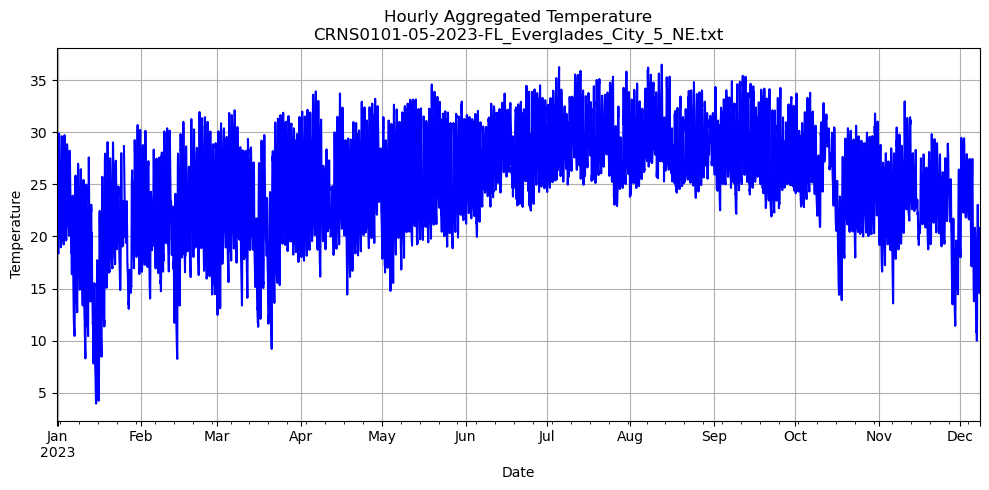

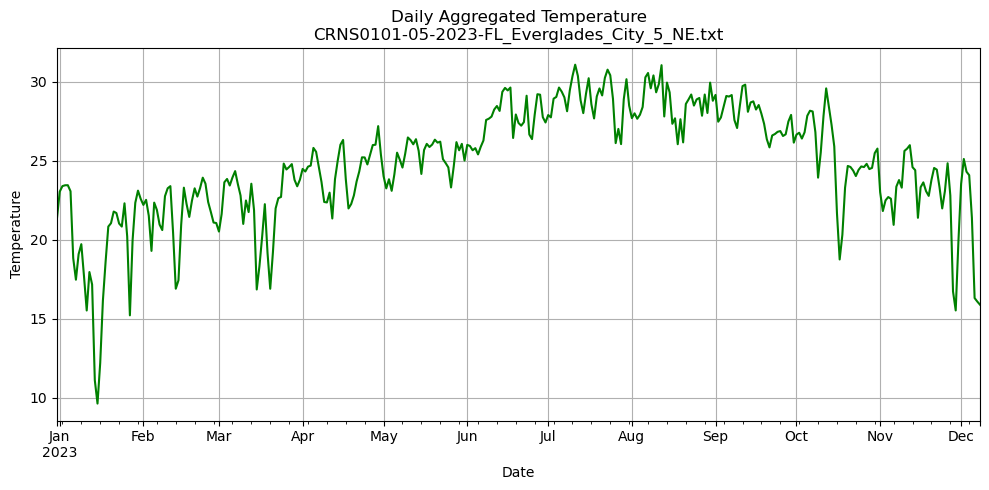

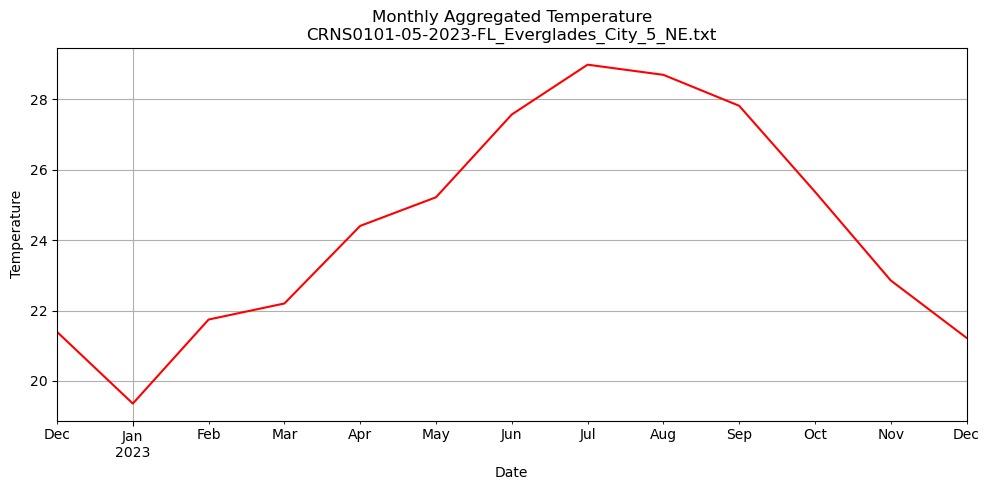

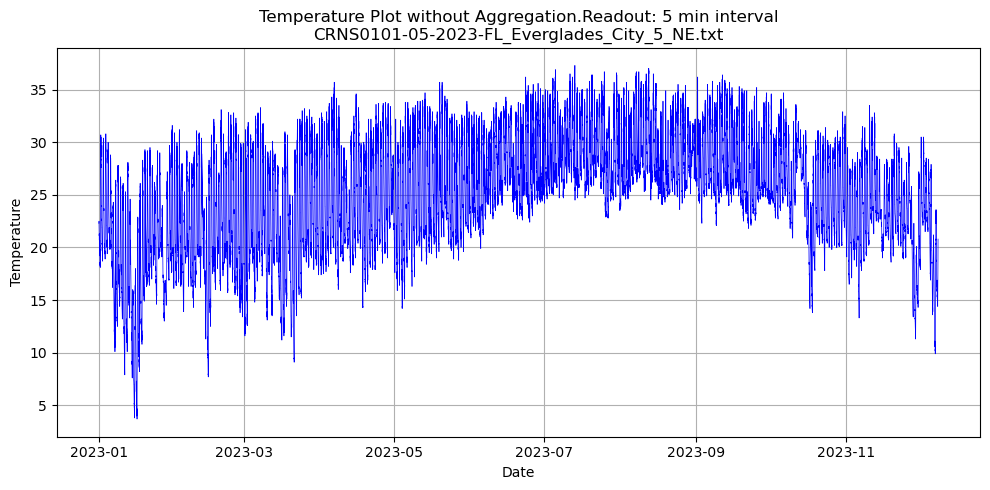

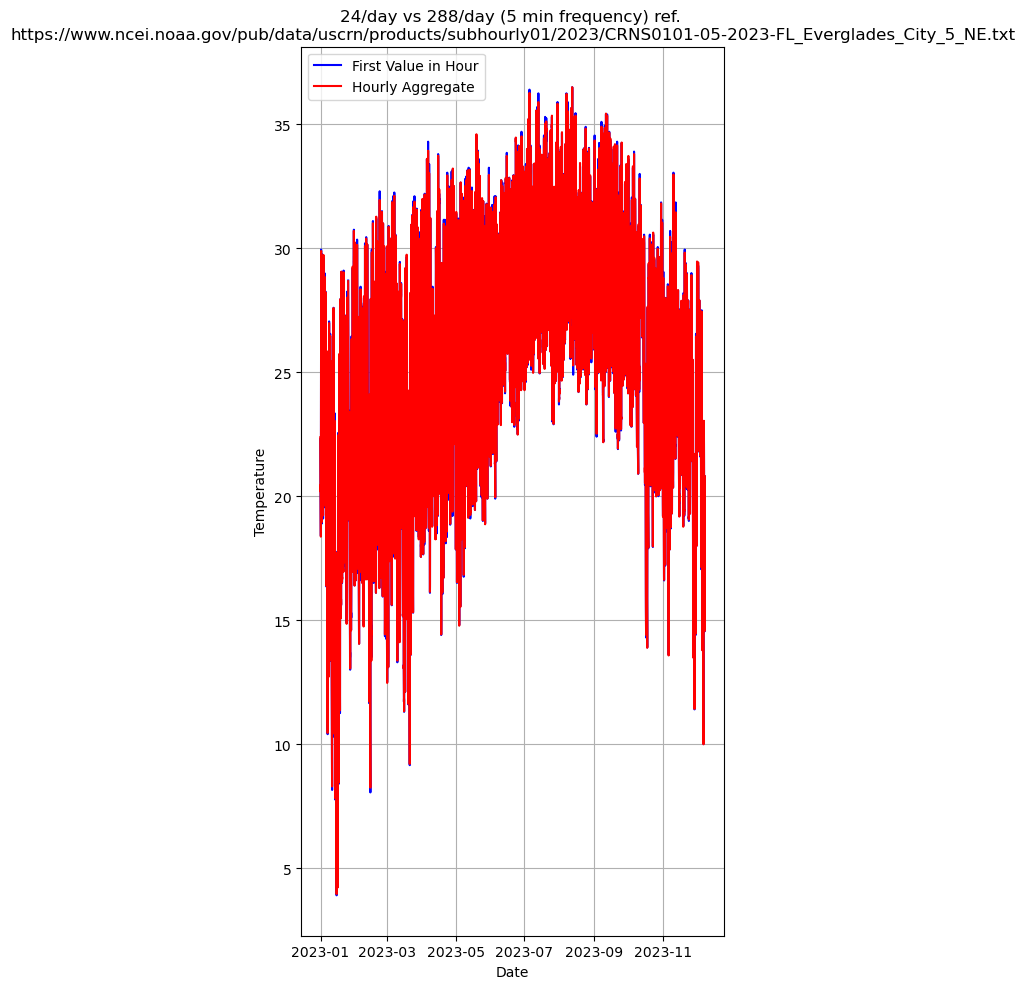

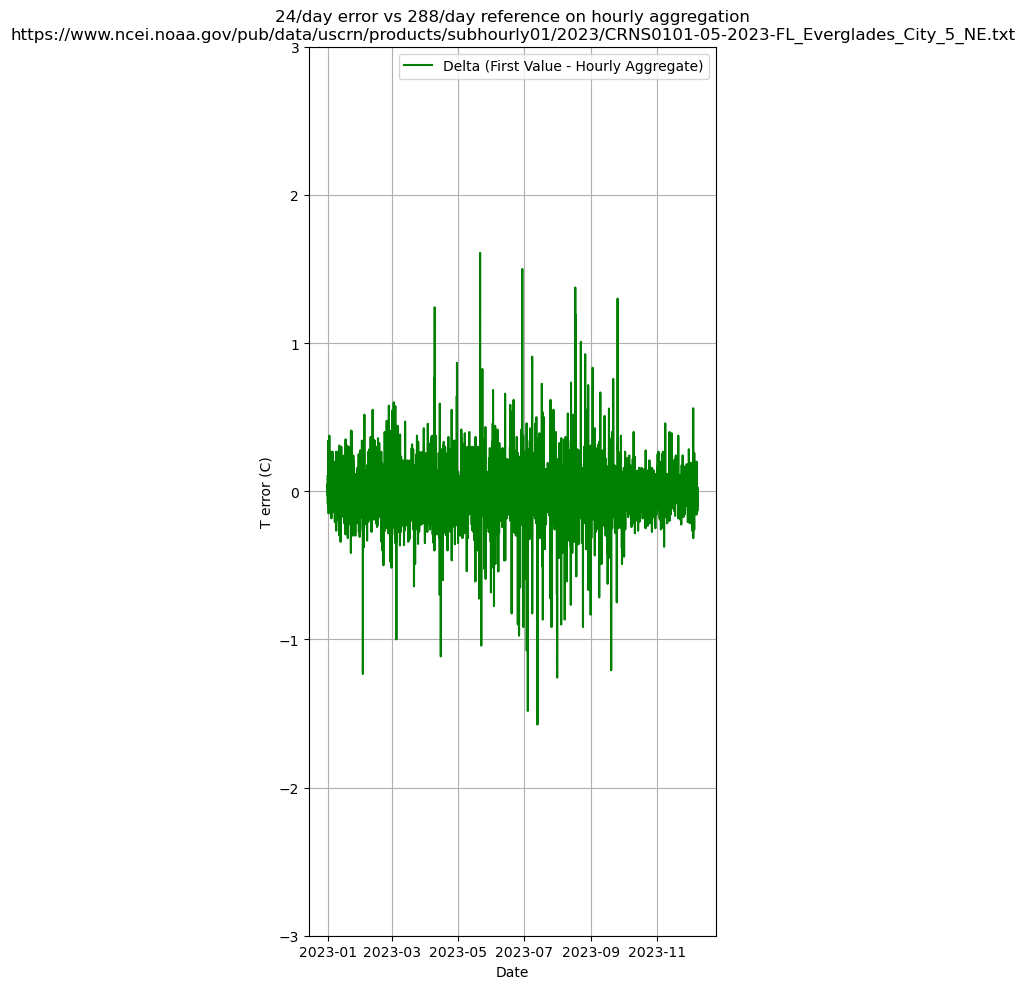

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import warnings
import numpy as np
import time
warnings.filterwarnings('ignore')

# URL to the data file
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-CA_Santa_Barbara_11_W.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-TX_Bronte_11_NNE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-AK_Red_Dog_Mine_3_SSW.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-AK_Ruby_44_ESE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-AK_Tok_70_SE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2022/CRNS0101-05-2022-AK_Utqiagvik_formerly_Barrow_4_ENE.txt'
url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-FL_Everglades_City_5_NE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-FL_Sebring_23_SSE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2022/CRNS0101-05-2022-HI_Hilo_5_S.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-AK_King_Salmon_42_SE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2022/CRNS0101-05-2022-ND_Northgate_5_ESE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2022/CRNS0101-05-2022-FL_Titusville_7_E.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-ND_Northgate_5_ESE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2023/CRNS0101-05-2023-AK_King_Salmon_42_SE.txt'
#url = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2018/CRNS0101-05-2018-ID_Murphy_10_W.txt' 
    
fname=url.split('/')[-1]

# Fetch data from the URL
response = requests.get(url)

# Introduce a delay of 2 seconds (you can adjust this as needed)
time.sleep(2)

# Check if the response is successful before proceeding
if response.status_code == 200:
    data = response.text

# Read the fetched data into a DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, skiprows=2,
                 names=['WBANNO', 'UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'CRX_VN',
                        'LONGITUDE', 'LATITUDE', 'AIR_TEMPERATURE', 'PRECIPITATION',
                        'SOLAR_RADIATION', 'SR_FLAG', 'SURFACE_TEMPERATURE', 'ST_TYPE',
                        'ST_FLAG', 'RELATIVE_HUMIDITY', 'RH_FLAG', 'SOIL_MOISTURE_5',
                        'SOIL_TEMPERATURE_5', 'WETNESS', 'WET_FLAG', 'WIND_1_5', 'WIND_FLAG'])


df['LST_TIME'] = df['LST_TIME'].astype(str).str.zfill(4)  # Ensure 4 digits for time
df['Datetime'] = pd.to_datetime(df['LST_DATE'].astype(str) + df['LST_TIME'], format='%Y%m%d%H%M', errors='coerce')


# Replace erroneous values (-9999) with NaN in the 'AIR_TEMPERATURE' column
df.loc[df['AIR_TEMPERATURE'] == -9999, 'AIR_TEMPERATURE'] = np.nan

# Remove rows with NaN or NaT values in the 'Datetime' column
df.dropna(subset=['Datetime'], inplace=True)
df.dropna(subset=['AIR_TEMPERATURE'], inplace=True)

df.set_index('Datetime', inplace=True)


# Plotting temperature data aggregated by hour
plt.figure(figsize=(10, 5))
df['AIR_TEMPERATURE'].resample('H').mean().plot(title='Hourly Aggregated Temperature\n'+ fname, color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting temperature data aggregated by day
plt.figure(figsize=(10, 5))
df['AIR_TEMPERATURE'].resample('D').mean().plot(title='Daily Aggregated Temperature\n'+ fname, color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting temperature data aggregated by month
plt.figure(figsize=(10, 5))
df['AIR_TEMPERATURE'].resample('M').mean().plot(title='Monthly Aggregated Temperature\n'+ fname, color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the temperature without any aggregation
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['AIR_TEMPERATURE'], color='blue', linewidth=0.5)
plt.title('Temperature Plot without Aggregation.Readout: 5 min interval\n'+ fname)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Resample to get the first value in each hour
first_value_hourly = df['AIR_TEMPERATURE'].resample('H').median()
# Calculate hourly aggregate temperature
hourly_aggregate = df['AIR_TEMPERATURE'].resample('H').mean()

# Plotting the first value in an hour versus the hourly aggregate
plt.figure(figsize=(5, 10))

# Plot the first value in an hour
plt.plot(first_value_hourly.index, first_value_hourly, label='First Value in Hour', color='blue')

# Plot the hourly aggregate
plt.plot(hourly_aggregate.index, hourly_aggregate, label='Hourly Aggregate', color='red')

plt.title('24/day vs 288/day (5 min frequency) ref. \n'+ url)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the difference between first value in an hour and hourly aggregate
delta = first_value_hourly - hourly_aggregate

# Plotting the delta between first value in an hour and hourly aggregate
plt.figure(figsize=(5, 10))

plt.plot(delta.index, delta, label='Delta (First Value - Hourly Aggregate)', color='green')

plt.title('24/day error vs 288/day reference on hourly aggregation\n'+ url)
plt.xlabel('Date')
plt.ylabel('T error (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(-3, 3) 
plt.show()

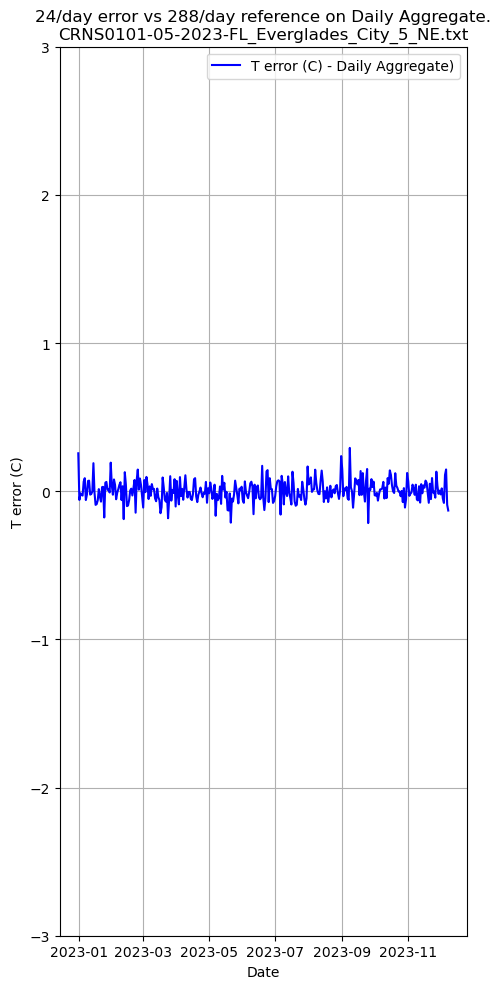

In [19]:
#Resample to get the first value in each hour
first_value_hourly = df['AIR_TEMPERATURE'].resample('H').first()

# Calculate hourly aggregate temperature
hourly_aggregate = df['AIR_TEMPERATURE'].resample('H').mean()

# Calculate the difference between first value in an hour and hourly aggregate
delta_hourly = first_value_hourly - hourly_aggregate

# Aggregate to daily values
daily_first_value = first_value_hourly.resample('D').mean()
daily_aggregate = hourly_aggregate.resample('D').mean()

# Calculate the difference between daily aggregated values
delta_daily = daily_first_value - daily_aggregate

# Plotting the delta between daily aggregated values
plt.figure(figsize=(5, 10))

plt.plot(delta_daily.index, delta_daily, label='T error (C) - Daily Aggregate)', color='blue')

plt.title('24/day error vs 288/day reference on Daily Aggregate.\n'+ fname)
plt.xlabel('Date')
plt.ylabel('T error (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(-3, 3) 
plt.show()

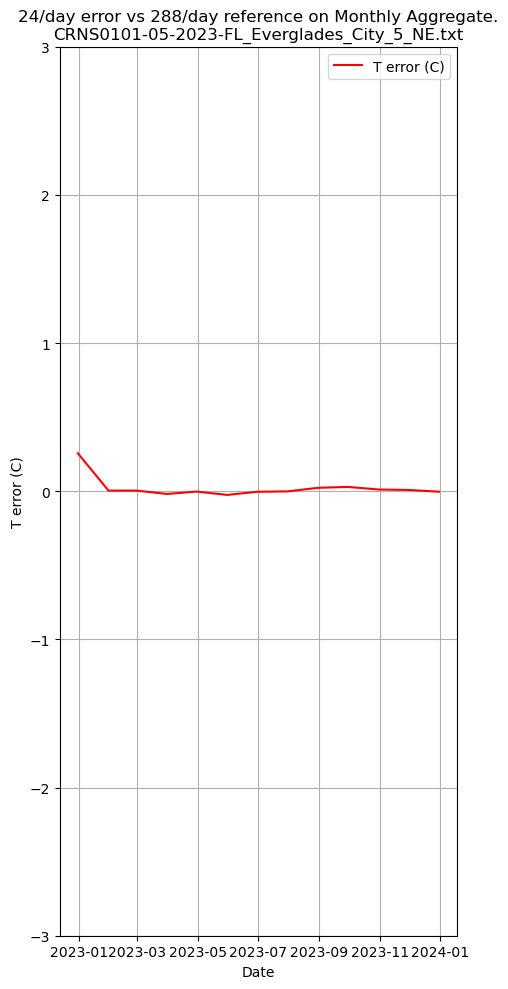

In [20]:
# Aggregate to monthly values
monthly_first_value = first_value_hourly.resample('M').mean()
monthly_aggregate = hourly_aggregate.resample('M').mean()

# Calculate the difference between monthly aggregated values
delta_monthly = monthly_first_value - monthly_aggregate

# Plotting the delta between monthly aggregated values
plt.figure(figsize=(5, 10))

plt.plot(delta_monthly.index, delta_monthly, label='T error (C)', color='red')
plt.title('24/day error vs 288/day reference on Monthly Aggregate.\n'+ fname)
plt.xlabel('Date')
plt.ylabel('T error (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(-3, 3) 
plt.show()

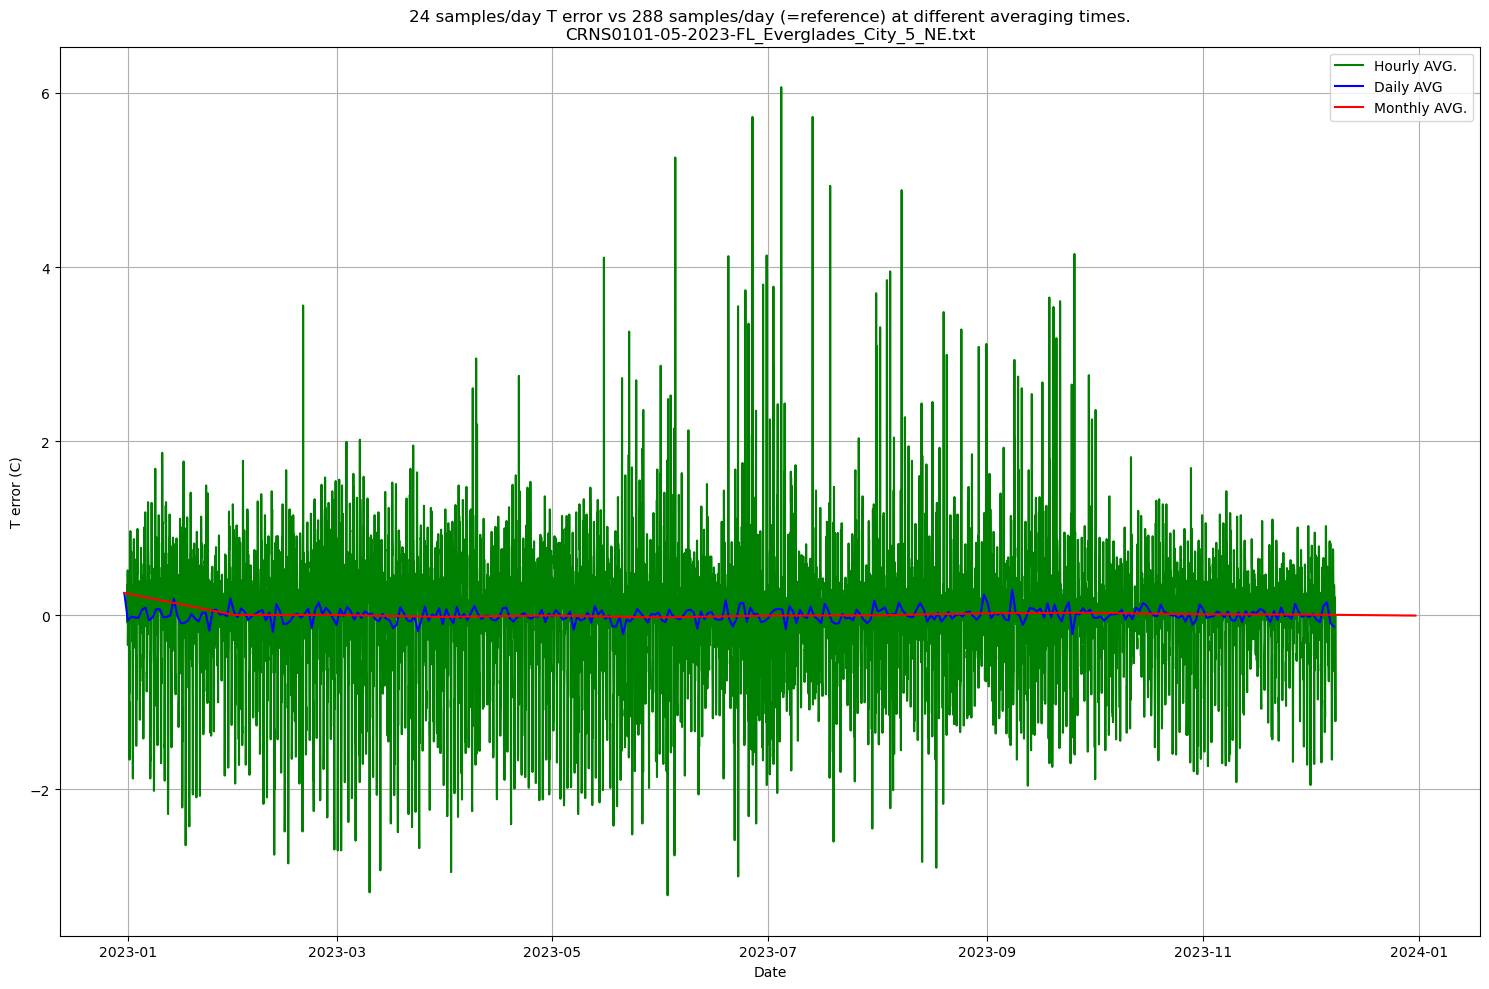

In [21]:
# Plotting the delta between hourly, daily, and monthly aggregated values
plt.figure(figsize=(15, 10))

plt.plot(delta_hourly.index, delta_hourly, label='Hourly AVG.', color='green')
plt.plot(delta_daily.index, delta_daily, label='Daily AVG', color='blue')
plt.plot(delta_monthly.index, delta_monthly, label='Monthly AVG.', color='red')

plt.title('24 samples/day T error vs 288 samples/day (=reference) at different averaging times.\n'+ fname)
plt.xlabel('Date')
plt.ylabel('T error (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

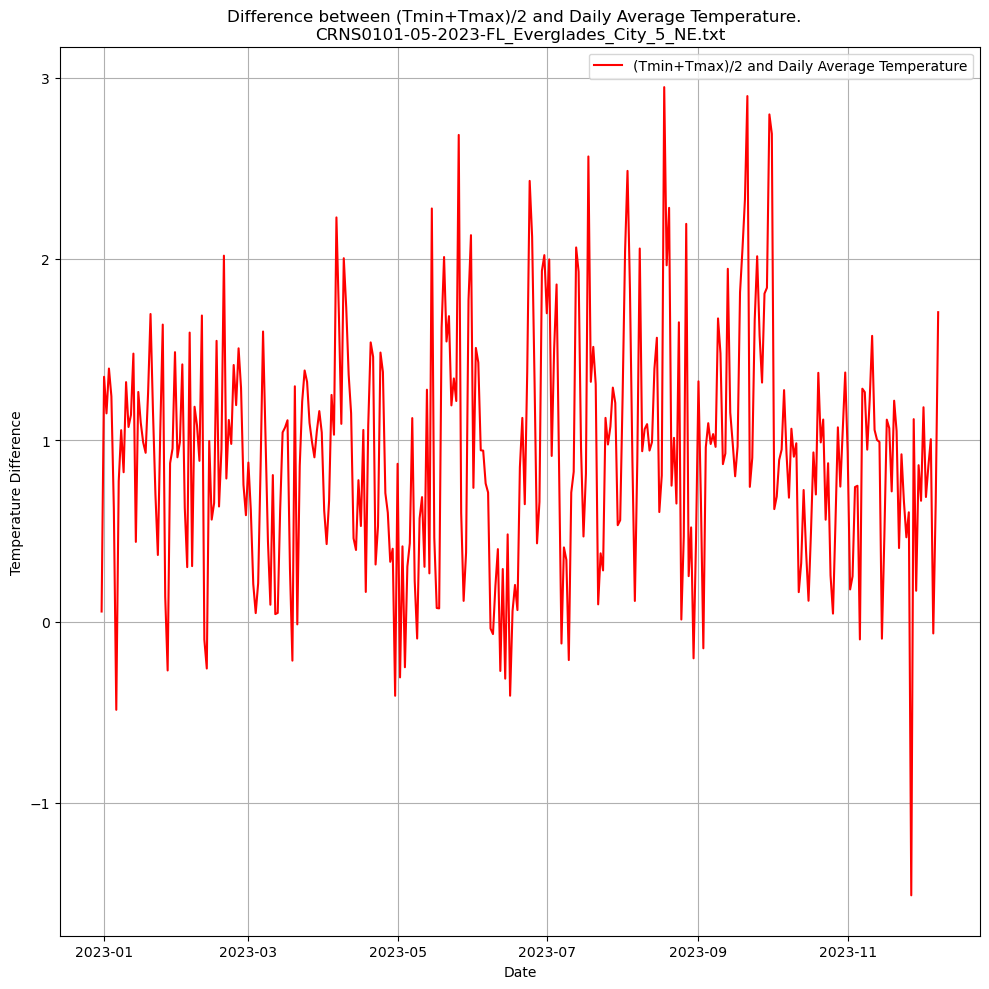

In [22]:
# Resample to get daily minimum and maximum temperatures
daily_min = df['AIR_TEMPERATURE'].resample('D').min()
daily_max = df['AIR_TEMPERATURE'].resample('D').max()

# Calculate DAILY_SPECIAL as (TMIN + TMAX) / 2
daily_special = (daily_min + daily_max) / 2

# Calculate the daily average temperature
daily_average = df['AIR_TEMPERATURE'].resample('D').mean()

# Plot the difference between DAILY_SPECIAL and daily average temperature
difference = daily_special - daily_average

plt.figure(figsize=(10, 10))
plt.plot(difference.index, difference, label='(Tmin+Tmax)/2 and Daily Average Temperature', color='red')

plt.title('Difference between (Tmin+Tmax)/2 and Daily Average Temperature.  \n'+ fname)
plt.xlabel('Date')
plt.ylabel('Temperature Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

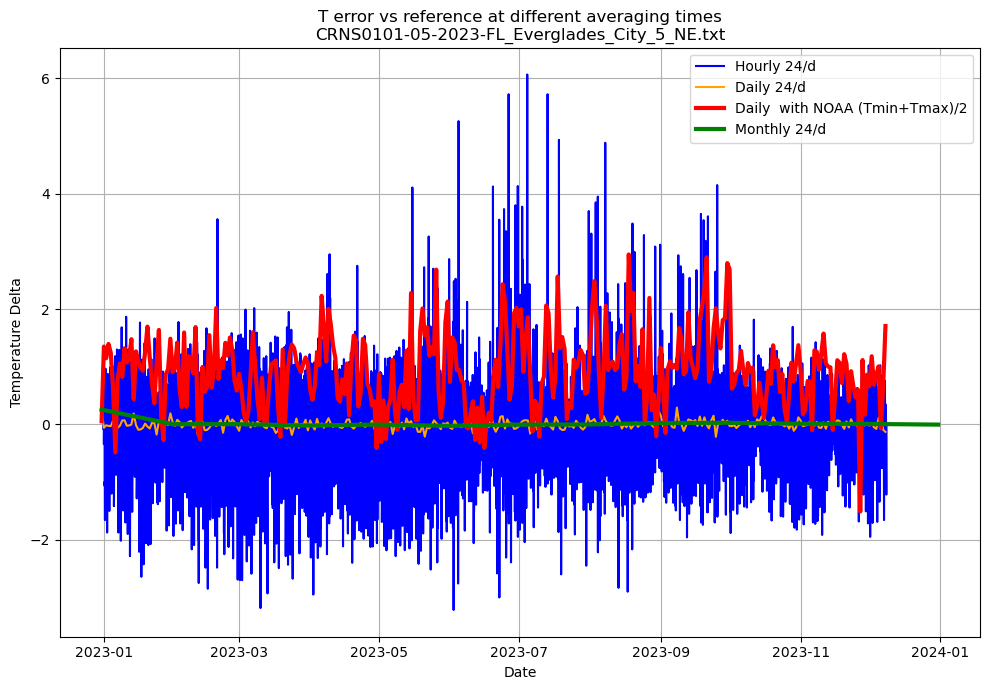

In [23]:
# Plotting the tracking error on hourly, daily, and monthly aggregated values
plt.figure(figsize=(10, 7))

plt.plot(delta_hourly.index, delta_hourly, label='Hourly 24/d', color='blue')
plt.plot(delta_daily.index, delta_daily, label='Daily 24/d', color='orange')
plt.plot(difference.index, difference, label='Daily  with NOAA (Tmin+Tmax)/2', color='red', linewidth=3)
plt.plot(delta_monthly.index, delta_monthly, label='Monthly 24/d', color='green',linewidth=3)

plt.title('T error vs reference at different averaging times\n'+fname)
plt.xlabel('Date')
plt.ylabel('Temperature Delta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


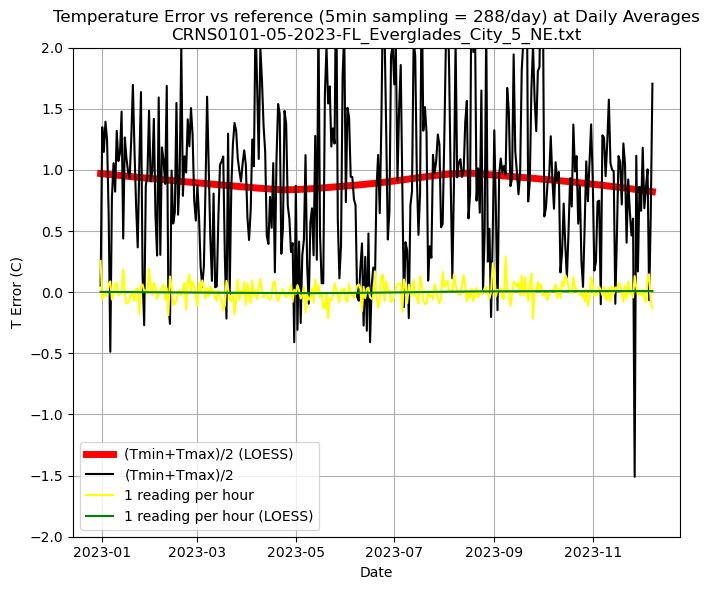

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you already have the delta dataframes: delta_hourly, delta_daily, delta_monthly, difference

# LOESS smoothing for each of the delta data
lowess_daily = sm.nonparametric.lowess(delta_daily.values, delta_daily.index.values)
smoothed_daily = lowess_daily[:, 1]

lowess_difference = sm.nonparametric.lowess(difference.values, difference.index.values)
smoothed_difference = lowess_difference[:, 1]

# Plotting the delta between hourly, daily, and monthly aggregated values with LOESS smoothing
plt.figure(figsize=(7, 6))


plt.plot(difference.index, smoothed_difference, label='(Tmin+Tmax)/2 (LOESS)', color='red',linewidth=5)
plt.plot(difference.index, difference, label='(Tmin+Tmax)/2', color='Black')
plt.plot(delta_daily.index, delta_daily, label='1 reading per hour', color='yellow')
plt.plot(delta_daily.index, smoothed_daily, label='1 reading per hour (LOESS)', color='green')

plt.title('Temperature Error vs reference (5min sampling = 288/day) at Daily Averages\n'+fname)
plt.xlabel('Date')
plt.ylabel('T Error (C)')
plt.legend()
plt.ylim(-2,2)
plt.grid(True)
plt.tight_layout()
plt.show()

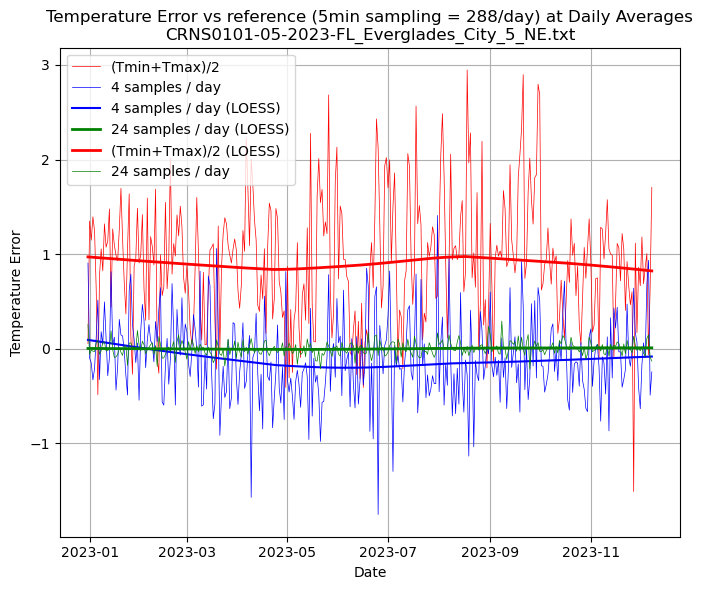

In [25]:
# Extract data for 3 specific times (e.g. SSMHI legacy classic: 7:00, 13:00, and 20:00)
times=['07:00','13:00','20:00']
#times=['00:00','08:00','16:00']
#times=['00:00','06:00','12:00','18:00']
#times=['00:00','04:00','08:00','12:00','16:00','20:00']
#times+=['00:02','06:00','10:00','14:00','18:00','22:00']
#times=['00:06','18:00']


df_T7T13T20 = pd.DataFrame()

for time in times:
    selected_data = df.between_time(time, time)
    df_T7T13T20 = pd.concat([df_T7T13T20, selected_data])

# Sort the DataFrame by datetime
df_T7T13T20 = df_T7T13T20.sort_index()

# Perform spline interpolation for hourly resampling
df_T7T13T20_splined = df_T7T13T20['AIR_TEMPERATURE'].resample('H').interpolate(method='quadratic')


# Resample data to every 6 hours and take the first value in each 6-hour interval for the 'AIR_TEMPERATURE' column
df_6hourly = df['AIR_TEMPERATURE'].resample('6H').first()
df_hourly_cubic = df_6hourly.resample('H').interpolate(method='spline', order=2)


# Aggregate the 6-hourly data to daily frequency by taking the mean for each day
df_6hourly_daily = df_6hourly.resample('D').mean()

# Calculate the true daily mean for the 'AIR_TEMPERATURE' column
true_daily_mean = df['AIR_TEMPERATURE'].resample('D').mean()

# Calculate the error between the resampled (6-hourly) daily mean and the true daily mean
error_6H =  df_6hourly_daily -true_daily_mean
error_splined = df_hourly_cubic.resample('D').mean()-true_daily_mean 
error_T7T13T20 =df_T7T13T20['AIR_TEMPERATURE'].resample('D').mean()-true_daily_mean
error_T7T13T20_splined = df_T7T13T20_splined.resample('D').mean()-true_daily_mean


lowess_6H = sm.nonparametric.lowess(error_6H.values, error_6H.index.values)
smoothed_6H = lowess_6H[:, 1]



# Plot the error versus the true daily mean
plt.figure(figsize=(7, 6))

plt.plot(difference.index, difference, label='(Tmin+Tmax)/2', color='red', linewidth=0.5)

plt.plot(true_daily_mean.index, error_6H, label='4 samples / day', color='blue',linewidth=0.5)

plt.plot(true_daily_mean.index, smoothed_6H, label='4 samples / day (LOESS)', color='blue')
plt.plot(delta_daily.index, smoothed_daily, label='24 samples / day (LOESS)', color='green',linewidth=2)
plt.plot(difference.index, smoothed_difference, label='(Tmin+Tmax)/2 (LOESS)', color='red',linewidth=2)
plt.plot(delta_daily.index, delta_daily, label='24 samples / day', color='green',linewidth=0.5)
plt.title('Temperature Error vs reference (5min sampling = 288/day) at Daily Averages\n'+fname)
plt.xlabel('Date')
plt.ylabel('Temperature Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

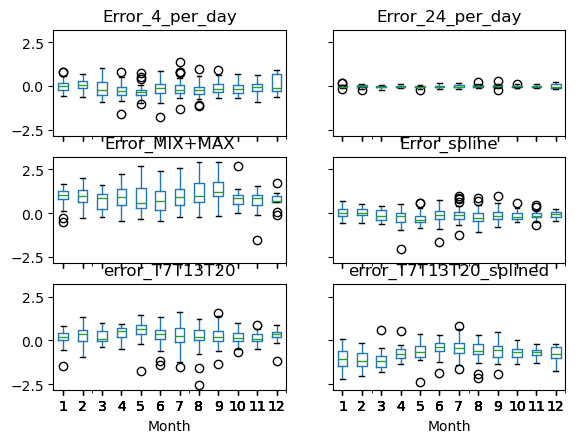

In [26]:
# Combine all error data into a single DataFrame
combined_data = pd.concat([error_6H, delta_daily, difference, error_splined, error_T7T13T20, error_T7T13T20_splined], axis=1)
combined_data.columns = ['Error_4_per_day', 'Error_24_per_day', 'Error_MIX+MAX', 'Error_spline', 'error_T7T13T20', 'error_T7T13T20_splined']

# Convert the index to datetime if needed
combined_data.index = pd.to_datetime(combined_data.index)

# Create a 'Month' column to group by
combined_data['Month'] = combined_data.index.month

# Group by month and create box plots
plt.figure(figsize=(12, 12))
combined_data.boxplot(column=['Error_4_per_day', 'Error_24_per_day', 'Error_MIX+MAX', 'Error_spline', 'error_T7T13T20', 'error_T7T13T20_splined'], by='Month', grid=False)
#plt.title('Monthly Error Box Plots')
plt.xlabel('Month')
plt.ylabel('Temperature Error')
plt.suptitle('')  # Remove default 'Boxplot grouped by Month' title
plt.show()

3 samples/day:
 07:00,13:00,20:00


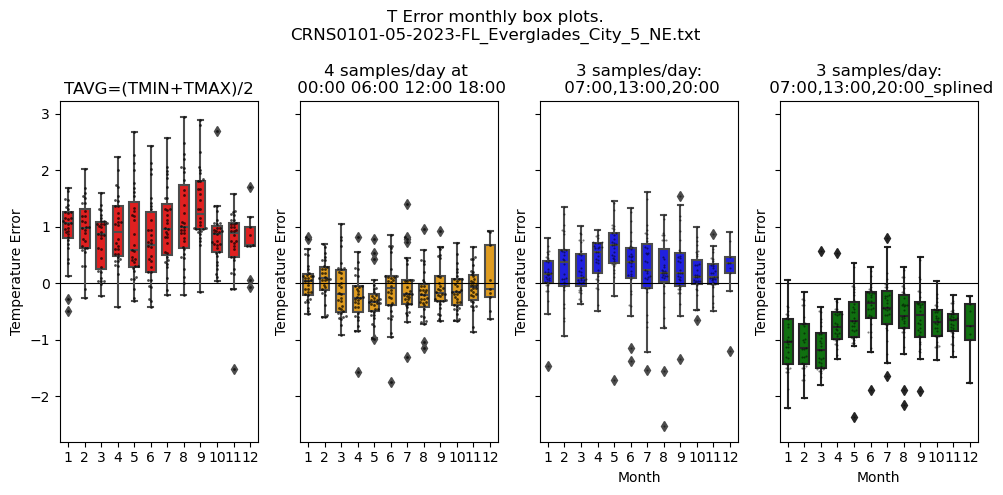

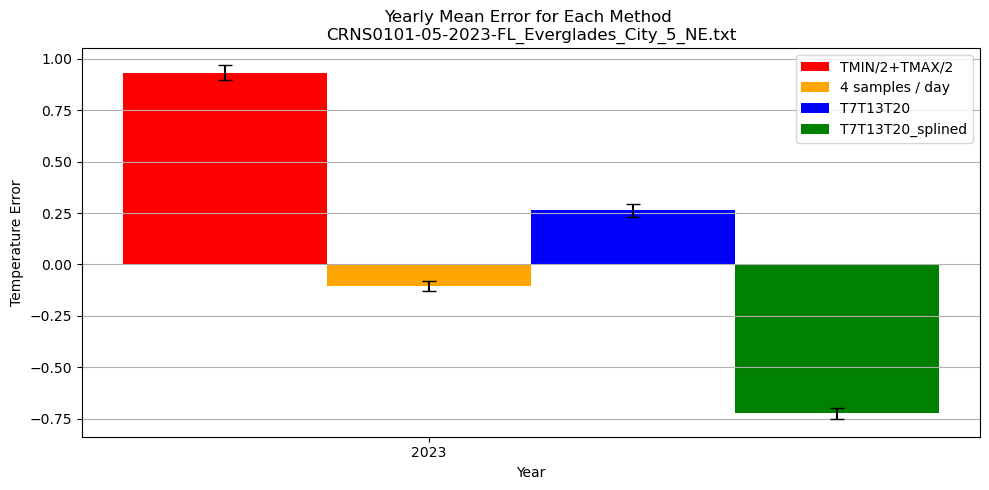

In [27]:
import seaborn as sns

schedule_legend= str((len(times))) + " samples/day:\n " + ",".join(times) 
print(schedule_legend)
# Create subplots for each method
fig, axs = plt.subplots(1, 4, figsize=(10, 5), sharex=True, sharey=True)

# Add y=0 line
for ax in axs:
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Box plot for Error_MIX+MAX
sns.boxplot(x='Month', y='Error_MIX+MAX', data=combined_data, ax=axs[0], width=0.6, color='red')
sns.swarmplot(x='Month', y='Error_MIX+MAX', data=combined_data, ax=axs[0], color='black', alpha=0.7,size=2)
axs[0].set_title('TAVG=(TMIN+TMAX)/2')
axs[0].set_ylabel('Temperature Error')
axs[0].set_xlabel('')


# Box plot for Error_6H
sns.boxplot(x='Month', y='Error_4_per_day', data=combined_data, ax=axs[1], width=0.6, color='orange')
sns.swarmplot(x='Month', y='Error_4_per_day', data=combined_data, ax=axs[1], color='black', alpha=0.7,size=2)
axs[1].set_title('4 samples/day at \n 00:00 06:00 12:00 18:00')
axs[1].set_ylabel('Temperature Error')
axs[1].set_xlabel('')

# Box plot for Error_24_per_day
sns.boxplot(x='Month', y='error_T7T13T20', data=combined_data, ax=axs[2], width=0.6, color='blue')
sns.swarmplot(x='Month', y='error_T7T13T20', data=combined_data, ax=axs[2], color='black', alpha=0.5, size=1.5)
axs[2].set_title(schedule_legend)
axs[2].set_ylabel('Temperature Error')
axs[2].set_xlabel('Month')

# Box plot for Error_24_per_day
sns.boxplot(x='Month', y='error_T7T13T20_splined', data=combined_data, ax=axs[3], width=0.6, color='green')
sns.swarmplot(x='Month', y='error_T7T13T20_splined', data=combined_data, ax=axs[3], color='black', alpha=0.5, size=1.5)
axs[3].set_title(schedule_legend+'_splined')
axs[3].set_ylabel('Temperature Error')
axs[3].set_xlabel('Month')


plt.suptitle('T Error monthly box plots.\n'+fname)
plt.tight_layout()
#plt.ylim(-1, 1.3)
plt.show()

import numpy as np


# Filter out the year
fyear=int(url.split("subhourly01/")[1].split('/')[0])

filtered_data = combined_data[combined_data.index.year == fyear]

# Calculate yearly mean error for each method excluding 2021
yearly_mean_error = filtered_data.groupby(filtered_data.index.year)[['Error_MIX+MAX', 'Error_4_per_day', 'Error_24_per_day', 'error_T7T13T20','error_T7T13T20_splined']].mean()

# Calculate standard error or confidence intervals for yearly means
yearly_std_error = filtered_data.groupby(filtered_data.index.year)[['Error_MIX+MAX', 'Error_4_per_day', 'Error_24_per_day', 'error_T7T13T20','error_T7T13T20_splined']].sem()

# Create a bar chart for yearly mean error excluding 2021 with error bars representing std error or confidence intervals
plt.figure(figsize=(10, 5))

# Number of bars
n = len(yearly_mean_error)
bar_width = 0.2

# Create positions for the bars
bar_positions = np.arange(n)

# Plotting the bars for each method with error bars
plt.bar(bar_positions - bar_width, yearly_mean_error['Error_MIX+MAX'], width=bar_width, yerr=yearly_std_error['Error_MIX+MAX'], capsize=5, label='TMIN/2+TMAX/2', color='red')
plt.bar(bar_positions, yearly_mean_error['Error_4_per_day'], width=bar_width, yerr=yearly_std_error['Error_4_per_day'], capsize=5, label='4 samples / day', color='orange')
plt.bar(bar_positions + bar_width, yearly_mean_error['error_T7T13T20'], width=bar_width, yerr=yearly_std_error['error_T7T13T20'], capsize=5, label='T7T13T20', color='blue')
plt.bar(bar_positions + 2*bar_width, yearly_mean_error['error_T7T13T20_splined'], width=bar_width, yerr=yearly_std_error['error_T7T13T20_splined'], capsize=5, label='T7T13T20_splined', color='green')

# Set x-axis labels and tick positions
plt.xticks(bar_positions, yearly_mean_error.index)

plt.title('Yearly Mean Error for Each Method \n'+fname)
plt.xlabel('Year')
plt.ylabel('Temperature Error')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
#plt.ylim(-1, 1.6)  # Setting y-axis limits
plt.show()
plt.show()

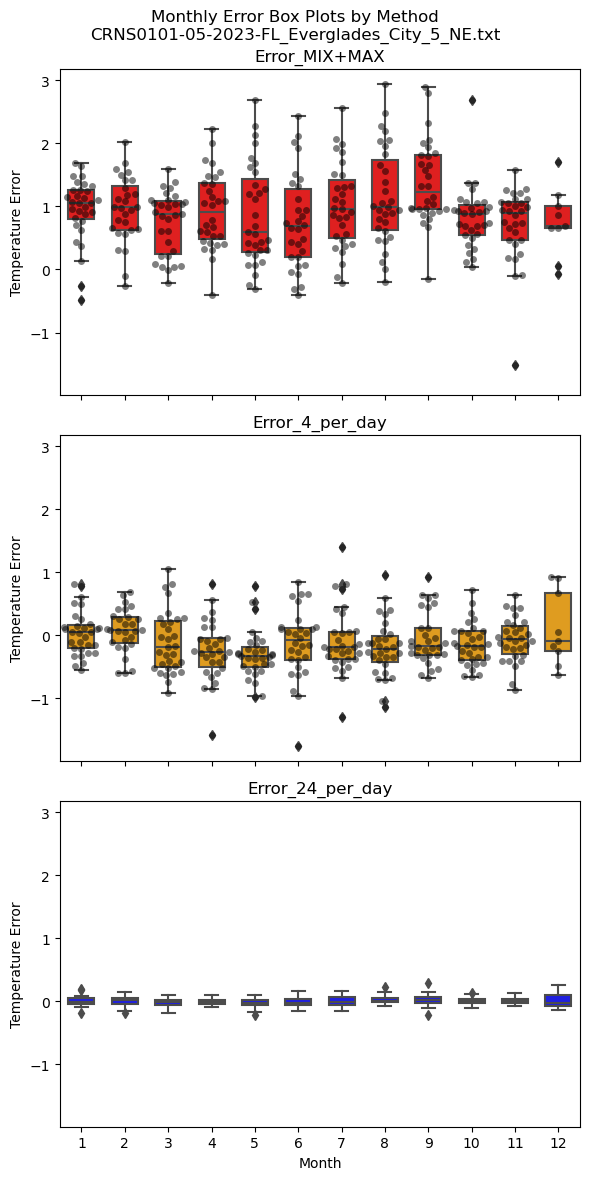

In [28]:
import seaborn as sns

# Create subplots for each method
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True, sharey=True)

# Box plot for Error_MIX+MAX
sns.boxplot(x='Month', y='Error_MIX+MAX', data=combined_data, ax=axs[0], width=0.6, color='red')
sns.swarmplot(x='Month', y='Error_MIX+MAX', data=combined_data, ax=axs[0], color='black', alpha=0.5)
axs[0].set_title('Error_MIX+MAX')
axs[0].set_ylabel('Temperature Error')
axs[0].set_xlabel('')

# Box plot for Error_6H
sns.boxplot(x='Month', y='Error_4_per_day', data=combined_data, ax=axs[1], width=0.6, color='orange')
sns.swarmplot(x='Month', y='Error_4_per_day', data=combined_data, ax=axs[1], color='black', alpha=0.5)
axs[1].set_title('Error_4_per_day')
axs[1].set_ylabel('Temperature Error')
axs[1].set_xlabel('')

# Box plot for Error_24_per_day
sns.boxplot(x='Month', y='Error_24_per_day', data=combined_data, ax=axs[2], width=0.6, color='blue')
axs[2].set_title('Error_24_per_day')
axs[2].set_ylabel('Temperature Error')
axs[2].set_xlabel('Month')


plt.suptitle('Monthly Error Box Plots by Method\n'+fname)
plt.tight_layout()
plt.show()

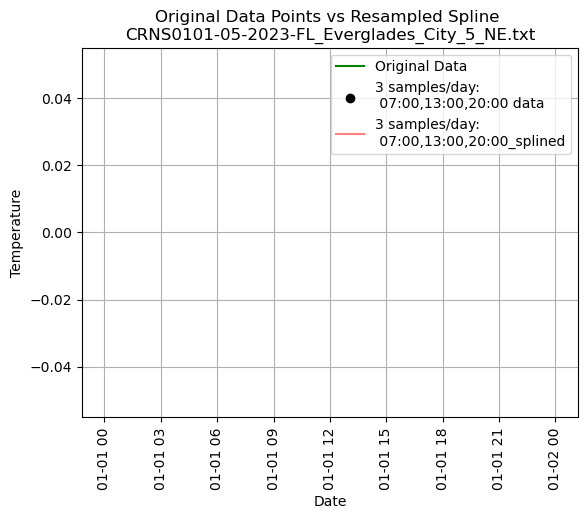

In [29]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

ws='2018-9-2'
we='2018-9-28'
# Filter data 

#plt.figure(figsize=(10, 4))


# Plotting the original data points for the second week of January
plt.xticks(rotation=90)
plt.plot(df[ws:we].index, df[ws:we]['AIR_TEMPERATURE'], label='Original Data', color='green', linestyle='-', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Temperature')
#plt.show()
# Plotting the resampled data as a line
plt.xticks(rotation=90)
plt.scatter(df_T7T13T20[ws:we]['AIR_TEMPERATURE'].index, df_T7T13T20[ws:we]['AIR_TEMPERATURE'], label=schedule_legend+' data', color='black')
plt.xlabel('Date')
plt.ylabel('Temperature')
#plt.show()
plt.xticks(rotation=90)
plt.plot(df_T7T13T20_splined[ws:we].index,df_T7T13T20_splined[ws:we], label=schedule_legend+'_splined', color='red',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Temperature')
#plt.show()
# Customize plot labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Data Points vs Resampled Spline ' +'\n'+fname)
plt.legend()
plt.grid(True)
plt.show()

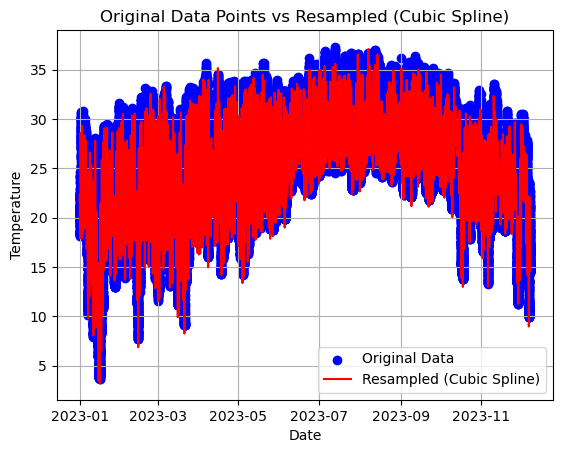

In [30]:
# Upsample to hourly frequency using cubic spline interpolation
sorder=3
df_hourly_cubic = df_6hourly.resample('H').interpolate(method='quadratic')

# Display the head of the upsampled DataFrame

# Plotting the original data as points
plt.scatter(df.index, df['AIR_TEMPERATURE'], label='Original Data', color='blue')

# Plotting the resampled data as a line
plt.plot(df_hourly_cubic.index, df_hourly_cubic, label='Resampled (Cubic Spline)', color='red')

# Customize plot labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Data Points vs Resampled (Cubic Spline)')
plt.legend()
plt.grid(True)
plt.show()